In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

In [4]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
print(type(x_train), x_train.shape)
print(np.min(x_train), np.max(x_train))

<class 'numpy.ndarray'> (50000, 32, 32, 3)
0.0 1.0


### ANN Initial Implementation
As comparason, implement a regular NN:
- 4 FC layers: 512, 256, 256, 256 neurons
- Dropout after each FC layer
- A FC output layer

Train the ANN model until training accuracy converges. Test the model's performance on the test data.

In [6]:
#1st part: Model Initilization and Construction

model_2 = tf.keras.Sequential()

model_2.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:])) #flatten layer before Fully-Connected (FC), or Dense, layer.

model_2.add(tf.keras.layers.Dense(512,activation='relu')) #1st layer
model_2.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_2.add(tf.keras.layers.Dense(256,activation='relu')) #2nd layer
model_2.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_2.add(tf.keras.layers.Dense(256,activation='relu')) #2nd layer
model_2.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_2.add(tf.keras.layers.Dense(256,activation='relu')) #2nd layer
model_2.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_2.add(tf.keras.layers.Dense(10,activation='softmax')) #output layer

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

print(model_2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [7]:
#2nd part: model training 
history_2=model_2.fit(x_train, y_train, epochs=50, batch_size=32, validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 23s 457us/sample - loss: 2.0245 - accuracy: 0.2406 - val_loss: 1.8554 - val_accuracy: 0.3213
Epoch 2/50
50000/50000 [==============================] - 22s 446us/sample - loss: 1.8956 - accuracy: 0.3032 - val_loss: 1.7958 - val_accuracy: 0.3417
Epoch 3/50
50000/50000 [==============================] - 22s 447us/sample - loss: 1.8463 - accuracy: 0.3254 - val_loss: 1.7499 - val_accuracy: 0.3651
Epoch 4/50
50000/50000 [==============================] - 22s 446us/sample - loss: 1.8238 - accuracy: 0.3356 - val_loss: 1.7372 - val_accuracy: 0.3746
Epoch 5/50
50000/50000 [==============================] - 22s 445us/sample - loss: 1.8014 - accuracy: 0.3455 - val_loss: 1.7046 - val_accuracy: 0.3935
Epoch 6/50
50000/50000 [==============================] - 23s 455us/sample - loss: 1.7856 - accuracy: 0.3513 - val_loss: 1.7203 - val_accuracy: 0.3811
Epoch 7/50
50000/50000 [====================

In [8]:
#3rd part: model validation on test data
scores = model_2.evaluate(x_test, y_test, verbose=2)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1]*100)

10000/10000 - 1s - loss: 1.6175 - accuracy: 0.4282
Test loss: 1.6174934043884277
Test accuracy: 42.820000648498535


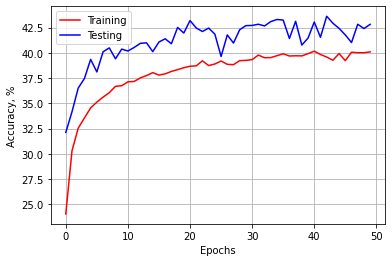

In [19]:
#Plotting model accuracy on training data as a function of epochs number

plt.plot(np.array(history_2.history['accuracy']) * 100, label='Training', color='r')
plt.plot(np.array(history_2.history['val_accuracy']) * 100, label='Testing', color='b')
plt.xlabel(r'Epochs')
plt.ylabel(r'Accuracy, %')
plt.legend()
plt.grid(which='major', axis='both')

In [20]:
# Save model, weights and history
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Model_ANN_Init'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_2.save(model_path)
print('Saved trained model at %s ' % model_path)

pickle_name = 'Model_ANN_Init_history.pickle'
df1 = pd.DataFrame(history_2.history)
df1.to_pickle(pickle_name)

INFO:tensorflow:Assets written to: C:\Users\jliu96\Desktop\CSC4777-NN-Project-main\saved_models\Model_ANN_Init\assets
Saved trained model at C:\Users\jliu96\Desktop\CSC4777-NN-Project-main\saved_models\Model_ANN_Init 


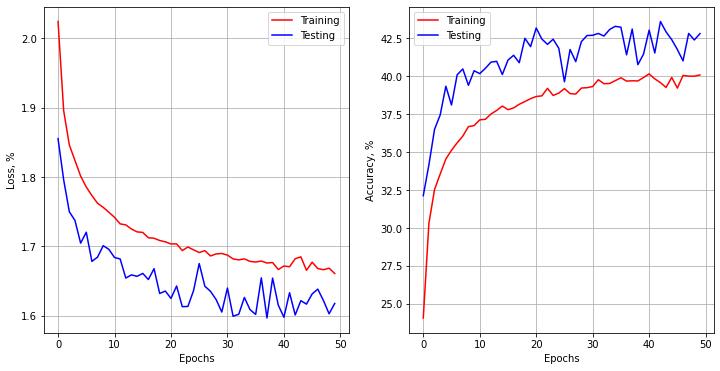

In [31]:
# Model loading and history record loading

model = tf.keras.models.load_model('saved_models/Model_ANN_Init')
df1 = pd.read_pickle('Model_ANN_Init_history.pickle')

plt.subplot(1,2,1)
plt.plot(np.array(df1['loss']), label="Training", color='r')
plt.plot(np.array(df1['val_loss']), label='Testing', color='b')
plt.xlabel(r'Epochs')
plt.ylabel(r'Loss, %')
plt.legend()
plt.grid(which='major', axis='both')
fig =plt.gcf()
fig.set_size_inches(12, 6)

plt.subplot(1,2,2)
plt.plot(np.array(df1['accuracy']) * 100, label='Training', color='r')
plt.plot(np.array(df1['val_accuracy']) * 100, label='Testing', color='b')
plt.xlabel(r'Epochs')
plt.ylabel(r'Accuracy, %')
plt.legend()
plt.grid(which='major', axis='both')

### ANN 2 hidden layers
As comparason, implement a regular NN:
- 2 FC layers: 512, 256 neurons
- Dropout after each FC layer
- A FC output layer

Train the ANN model until training accuracy converges. Test the model's performance on the test data.

In [75]:
#1st part: Model Initilization and Construction

model_2hid = tf.keras.Sequential()

model_2hid.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:])) #flatten layer before Fully-Connected (FC), or Dense, layer.

model_2hid.add(tf.keras.layers.Dense(512,activation='relu')) #1st layer
model_2hid.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_2hid.add(tf.keras.layers.Dense(512,activation='relu')) #2nd layer
model_2hid.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_2hid.add(tf.keras.layers.Dense(10,activation='softmax')) #output layer

model_2hid.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

print(model_2hid.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
___________________________________________

In [76]:
#2nd part: model training 
history_2hid=model_2hid.fit(x_train, y_train, epochs=50, batch_size=32, validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 24s 484us/sample - loss: 1.9865 - accuracy: 0.2650 - val_loss: 1.8712 - val_accuracy: 0.3113
Epoch 2/50
50000/50000 [==============================] - 24s 490us/sample - loss: 1.8743 - accuracy: 0.3118 - val_loss: 1.7837 - val_accuracy: 0.3611
Epoch 3/50
50000/50000 [==============================] - 24s 471us/sample - loss: 1.8389 - accuracy: 0.3304 - val_loss: 1.7528 - val_accuracy: 0.3733
Epoch 4/50
50000/50000 [==============================] - 24s 473us/sample - loss: 1.8003 - accuracy: 0.3433 - val_loss: 1.7314 - val_accuracy: 0.3822
Epoch 5/50
50000/50000 [==============================] - 24s 474us/sample - loss: 1.7812 - accuracy: 0.3508 - val_loss: 1.7079 - val_accuracy: 0.3952
Epoch 6/50
50000/50000 [==============================] - 25s 499us/sample - loss: 1.7722 - accuracy: 0.3568 - val_loss: 1.6713 - val_accuracy: 0.4061
Epoch 7/50
50000/50000 [====================

In [77]:
#3rd part: model validation on test data
scores = model_2hid.evaluate(x_test, y_test, verbose=2)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1]*100)

10000/10000 - 1s - loss: 1.6118 - accuracy: 0.4282
Test loss: 1.6117541179656982
Test accuracy: 42.820000648498535


In [78]:
# Save model, weights and history
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Model_ANN_2hid512_512'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_2hid.save(model_path)
print('Saved trained model at %s ' % model_path)

pickle_name = 'Model_ANN_2hid512_512_history.pickle'
df1 = pd.DataFrame(history_2hid.history)
df1.to_pickle(pickle_name)

INFO:tensorflow:Assets written to: C:\Users\jliu96\Desktop\CSC4777-NN-Project-main\saved_models\Model_ANN_2hid512_512\assets
Saved trained model at C:\Users\jliu96\Desktop\CSC4777-NN-Project-main\saved_models\Model_ANN_2hid512_512 


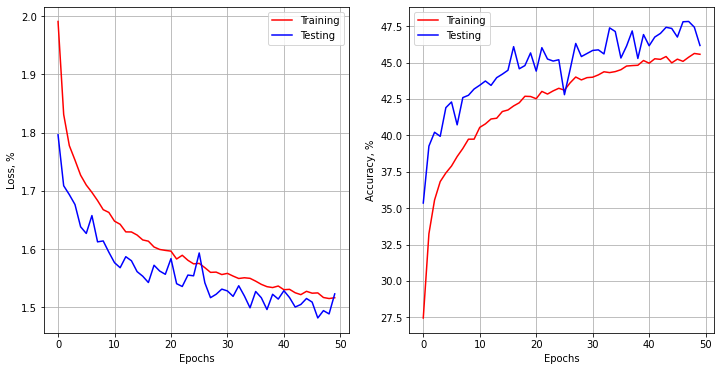

In [72]:
# Model loading and history record loading

model = tf.keras.models.load_model('saved_models/Model_ANN_2hid512_512')
df1 = pd.read_pickle('Model_ANN_2hid512_512_history.pickle')

plt.subplot(1,2,1)
plt.plot(np.array(df1['loss']), label="Training", color='r')
plt.plot(np.array(df1['val_loss']), label='Testing', color='b')
plt.xlabel(r'Epochs')
plt.ylabel(r'Loss, %')
plt.legend()
plt.grid(which='major', axis='both')
fig =plt.gcf()
fig.set_size_inches(12, 6)

plt.subplot(1,2,2)
plt.plot(np.array(df1['accuracy']) * 100, label='Training', color='r')
plt.plot(np.array(df1['val_accuracy']) * 100, label='Testing', color='b')
plt.xlabel(r'Epochs')
plt.ylabel(r'Accuracy, %')
plt.legend()
plt.grid(which='major', axis='both')

### ANN 1 hidden layers
As comparason, implement a regular NN:
- 1 FC layers: 512 neurons
- Dropout after each FC layer
- A FC output layer

Train the ANN model until training accuracy converges. Test the model's performance on the test data.

In [6]:
#1st part: Model Initilization and Construction

model_1hid = tf.keras.Sequential()

model_1hid.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:])) #flatten layer before Fully-Connected (FC), or Dense, layer.

model_1hid.add(tf.keras.layers.Dense(256,activation='relu')) #1st layer
model_1hid.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_1hid.add(tf.keras.layers.Dense(10,activation='softmax')) #output layer

model_1hid.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

print(model_1hid.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
#2nd part: model training 
history_1hid=model_1hid.fit(x_train, y_train, epochs=50, batch_size=32, validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 215us/sample - loss: 1.9804 - accuracy: 0.2727 - val_loss: 1.8020 - val_accuracy: 0.3603
Epoch 2/50
50000/50000 [==============================] - 11s 222us/sample - loss: 1.8662 - accuracy: 0.3166 - val_loss: 1.7843 - val_accuracy: 0.3464
Epoch 3/50
50000/50000 [==============================] - 10s 210us/sample - loss: 1.8429 - accuracy: 0.3262 - val_loss: 1.7538 - val_accuracy: 0.3728
Epoch 4/50
50000/50000 [==============================] - 10s 201us/sample - loss: 1.8254 - accuracy: 0.3321 - val_loss: 1.7459 - val_accuracy: 0.3671
Epoch 5/50
50000/50000 [==============================] - 10s 197us/sample - loss: 1.8130 - accuracy: 0.3379 - val_loss: 1.7099 - val_accuracy: 0.3888
Epoch 6/50
50000/50000 [==============================] - 10s 198us/sample - loss: 1.8049 - accuracy: 0.3400 - val_loss: 1.7235 - val_accuracy: 0.3757
Epoch 7/50
50000/50000 [====================

In [8]:
#3rd part: model validation on test data
scores = model_1hid.evaluate(x_test, y_test, verbose=2)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1]*100)

10000/10000 - 1s - loss: 1.6325 - accuracy: 0.4203
Test loss: 1.6324675102233888
Test accuracy: 42.03000068664551


In [9]:
# Save model, weights and history
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Model_ANN_1hid256'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_1hid.save(model_path)
print('Saved trained model at %s ' % model_path)

pickle_name = 'Model_ANN_1hid256_history.pickle'
df1 = pd.DataFrame(history_1hid.history)
df1.to_pickle(pickle_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\jliu96\Desktop\CSC4777-NN-Project-main\saved_models\Model_ANN_1hid256\assets
Saved trained model at C:\Users\jliu96\Desktop\CSC4777-NN-Project-main\saved_models\Model_ANN_1hid256 


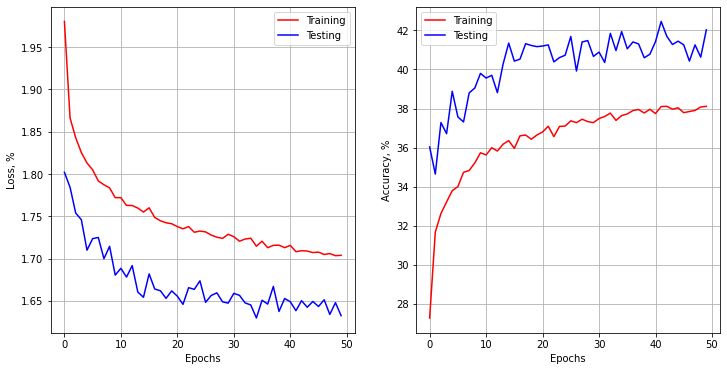

In [10]:
# Model loading and history record loading

model = tf.keras.models.load_model('saved_models/Model_ANN_1hid256')
df1 = pd.read_pickle('Model_ANN_1hid256_history.pickle')

plt.subplot(1,2,1)
plt.plot(np.array(df1['loss']), label="Training", color='r')
plt.plot(np.array(df1['val_loss']), label='Testing', color='b')
plt.xlabel(r'Epochs')
plt.ylabel(r'Loss, %')
plt.legend()
plt.grid(which='major', axis='both')
fig =plt.gcf()
fig.set_size_inches(12, 6)

plt.subplot(1,2,2)
plt.plot(np.array(df1['accuracy']) * 100, label='Training', color='r')
plt.plot(np.array(df1['val_accuracy']) * 100, label='Testing', color='b')
plt.xlabel(r'Epochs')
plt.ylabel(r'Accuracy, %')
plt.legend()
plt.grid(which='major', axis='both')

### ANN 3 hidden layers
As comparason, implement a regular NN:
- 3 FC layers: 512, 256, 256 neurons
- Dropout after each FC layer
- A FC output layer

Train the ANN model until training accuracy converges. Test the model's performance on the test data.

In [55]:
#1st part: Model Initilization and Construction

model_3hid = tf.keras.Sequential()

model_3hid.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:])) #flatten layer before Fully-Connected (FC), or Dense, layer.

model_3hid.add(tf.keras.layers.Dense(512,activation='relu')) #1st layer
model_3hid.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_3hid.add(tf.keras.layers.Dense(256,activation='relu')) #2nd layer
model_3hid.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_3hid.add(tf.keras.layers.Dense(256,activation='relu')) #2nd layer
model_3hid.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_3hid.add(tf.keras.layers.Dense(10,activation='softmax')) #output layer

model_3hid.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

print(model_3hid.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)              

In [56]:
#2nd part: model training 
history_3hid=model_3hid.fit(x_train, y_train, epochs=50, batch_size=32, validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 24s 473us/sample - loss: 2.0068 - accuracy: 0.2512 - val_loss: 1.8491 - val_accuracy: 0.3301
Epoch 2/50
50000/50000 [==============================] - 21s 416us/sample - loss: 1.8936 - accuracy: 0.3023 - val_loss: 1.8059 - val_accuracy: 0.3510
Epoch 3/50
50000/50000 [==============================] - 21s 417us/sample - loss: 1.8483 - accuracy: 0.3187 - val_loss: 1.7873 - val_accuracy: 0.3561
Epoch 4/50
50000/50000 [==============================] - 21s 418us/sample - loss: 1.8273 - accuracy: 0.3309 - val_loss: 1.7865 - val_accuracy: 0.3604
Epoch 5/50
50000/50000 [==============================] - 21s 418us/sample - loss: 1.8029 - accuracy: 0.3402 - val_loss: 1.7407 - val_accuracy: 0.3854
Epoch 6/50
50000/50000 [==============================] - 21s 415us/sample - loss: 1.7979 - accuracy: 0.3447 - val_loss: 1.6893 - val_accuracy: 0.3964
Epoch 7/50
50000/50000 [====================

In [57]:
#3rd part: model validation on test data
scores = model_3hid.evaluate(x_test, y_test, verbose=2)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1]*100)

10000/10000 - 1s - loss: 1.6262 - accuracy: 0.4288
Test loss: 1.626228203201294
Test accuracy: 42.87999868392944


In [58]:
# Save model, weights and history
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Model_ANN_3hid_512_256_256'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_3hid.save(model_path)
print('Saved trained model at %s ' % model_path)

pickle_name = 'Model_ANN_3hid512_256_256_history.pickle'
df1 = pd.DataFrame(history_3hid.history)
df1.to_pickle(pickle_name)

INFO:tensorflow:Assets written to: C:\Users\jliu96\Desktop\CSC4777-NN-Project-main\saved_models\Model_ANN_3hid_512_256_256\assets
Saved trained model at C:\Users\jliu96\Desktop\CSC4777-NN-Project-main\saved_models\Model_ANN_3hid_512_256_256 


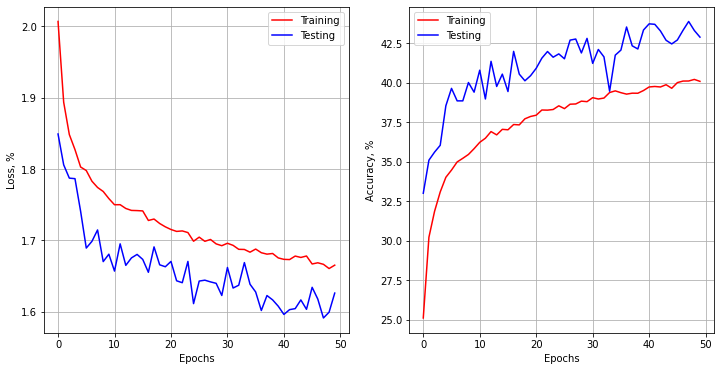

In [59]:
# Model loading and history record loading

model = tf.keras.models.load_model('saved_models/Model_ANN_1hid2048')
df1 = pd.read_pickle('Model_ANN_3hid512_256_256_history.pickle')

plt.subplot(1,2,1)
plt.plot(np.array(df1['loss']), label="Training", color='r')
plt.plot(np.array(df1['val_loss']), label='Testing', color='b')
plt.xlabel(r'Epochs')
plt.ylabel(r'Loss, %')
plt.legend()
plt.grid(which='major', axis='both')
fig =plt.gcf()
fig.set_size_inches(12, 6)

plt.subplot(1,2,2)
plt.plot(np.array(df1['accuracy']) * 100, label='Training', color='r')
plt.plot(np.array(df1['val_accuracy']) * 100, label='Testing', color='b')
plt.xlabel(r'Epochs')
plt.ylabel(r'Accuracy, %')
plt.legend()
plt.grid(which='major', axis='both')